# Diabetes in 130 US hospitals for the years 1999 to 2008

## Data preparation

**Abstract**: This data has been prepared to analyze factors related to readmission as well as other outcomes pertaining to patients with diabetes.

**Data Set Information**: The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.

 1. It is an inpatient encounter (a hospital admission).
 2. It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
 3. The length of stay was at least 1 day and at most 14 days.
 4. Laboratory tests were performed during the encounter.
 5. Medications were administered during the encounter.

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.

More information can be found at the [Diabetes 130-US hospitals for years 1999-2008 data set - UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008) web site.

 - [Loading data](#Loading-data)
 - [Exploratory data analysis](#Exploratory-data-analysis)
   - [Removing NAs](#Removing-NAs)
   - [Converting categorical variables into dummy variables](#Converting-categorical-variables-into-dummy-variables)
 - [Saving results](#Saving-results)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

# Loading data

In [3]:
df = pd.read_csv('data/diabetic_data.csv', na_values='?', low_memory=False)
obj_cols = list(df.select_dtypes('object').columns)
df[obj_cols] = df[obj_cols].astype('category')

In [4]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        99493 non-null category
gender                      101766 non-null category
age                         101766 non-null category
weight                      3197 non-null category
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  61510 non-null category
medical_specialty           51817 non-null category
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient          

In [6]:
df.nunique().sort_values(ascending=False)

encounter_id                101766
patient_nbr                 71518 
diag_3                      789   
diag_2                      748   
diag_1                      716   
num_lab_procedures          118   
num_medications             75    
medical_specialty           72    
number_outpatient           39    
number_emergency            33    
discharge_disposition_id    26    
number_inpatient            21    
admission_source_id         17    
payer_code                  17    
number_diagnoses            16    
time_in_hospital            14    
age                         10    
weight                      9     
admission_type_id           8     
num_procedures              7     
race                        5     
repaglinide                 4     
max_glu_serum               4     
A1Cresult                   4     
metformin                   4     
rosiglitazone               4     
pioglitazone                4     
insulin                     4     
nateglinide         

In [7]:
df.describe().applymap('{:.1f}'.format)

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.0,101766.0,101766.0,101766.0,101766.0,101766.0,101766.0,101766.0,101766.0,101766.0,101766.0,101766.0,101766.0
mean,165201645.6,54330400.7,2.0,3.7,5.8,4.4,43.1,1.3,16.0,0.4,0.2,0.6,7.4
std,102640296.0,38696359.3,1.4,5.3,4.1,3.0,19.7,1.7,8.1,1.3,0.9,1.3,1.9
min,12522.0,135.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
25%,84961194.0,23413221.0,1.0,1.0,1.0,2.0,31.0,0.0,10.0,0.0,0.0,0.0,6.0
50%,152388987.0,45505143.0,1.0,1.0,7.0,4.0,44.0,1.0,15.0,0.0,0.0,0.0,8.0
75%,230270887.5,87545949.8,3.0,4.0,7.0,6.0,57.0,2.0,20.0,0.0,0.0,1.0,9.0
max,443867222.0,189502619.0,8.0,28.0,25.0,14.0,132.0,6.0,81.0,42.0,76.0,21.0,16.0


# Exploratory data analysis

In [8]:
missing_values = df.isnull().sum()/df.shape[0]*100
missing_values.sort_values(ascending=True, inplace=True)
missing_df = missing_values.reset_index().rename(columns={'index': 'features', 0: 'values'})

In [9]:
missing_df.loc[missing_df['values'] != 0].sort_values(by='values', ascending=False)

,features,values
49,weight,96.858479
48,medical_specialty,49.082208
47,payer_code,39.557416
46,race,2.233555
45,diag_3,1.398306
44,diag_2,0.351787
43,diag_1,0.020636


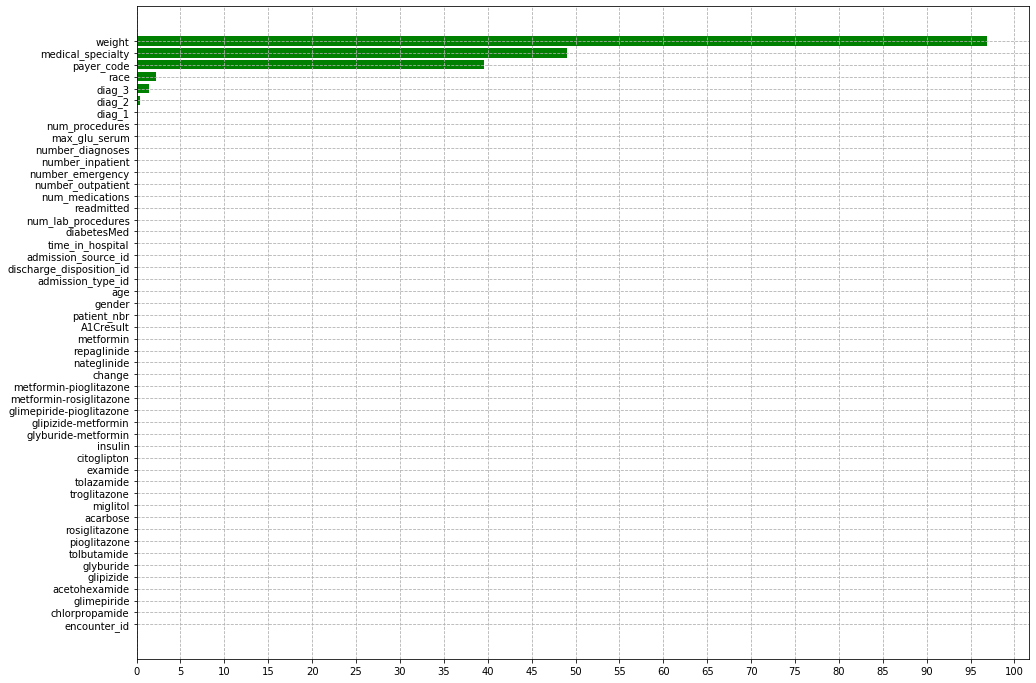

In [10]:
fig, axes = plt.subplots(figsize=(16, 12))
axes.barh(missing_df['features'], missing_df['values'], color='g')
plt.xticks(np.linspace(0, 100, 21))
plt.grid(True, linestyle='--');

In [11]:
df['race'].unique()

[Caucasian, AfricanAmerican, NaN, Other, Asian, Hispanic]
Categories (5, object): [Caucasian, AfricanAmerican, Other, Asian, Hispanic]

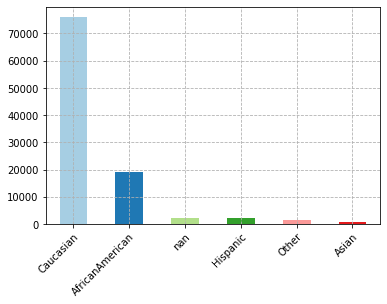

In [12]:
race_sorted_df = df['race'].value_counts(dropna=False)
ax = race_sorted_df.plot(kind='bar', color=plt.cm.Paired.colors)
plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor", rotation=45)
plt.grid(True, linestyle='--');

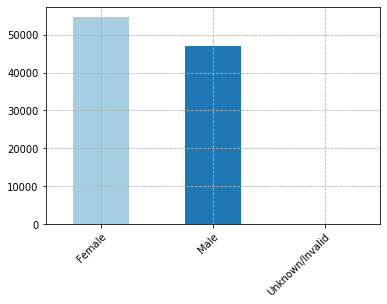

In [13]:
gender_sorted_df = df['gender'].value_counts(dropna=False)
ax = gender_sorted_df.plot(kind='bar', color=plt.cm.Paired.colors)
plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor", rotation=45)
plt.grid(True, linestyle='--');

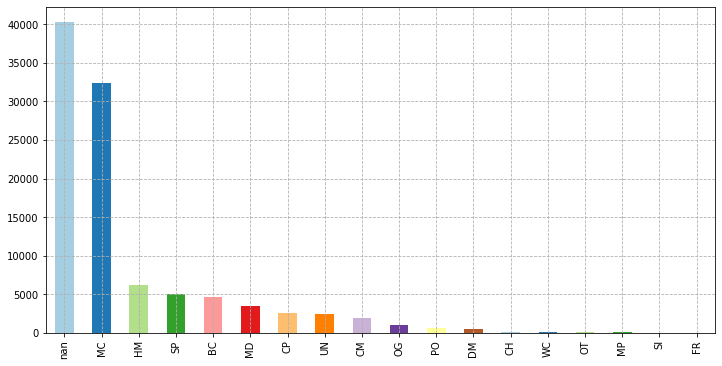

In [14]:
payer_code_sorted_df = df['payer_code'].value_counts(dropna=False)
payer_code_sorted_df.plot(kind='bar', color=plt.cm.Paired.colors, figsize=(12, 6))
plt.grid(True, linestyle='--');

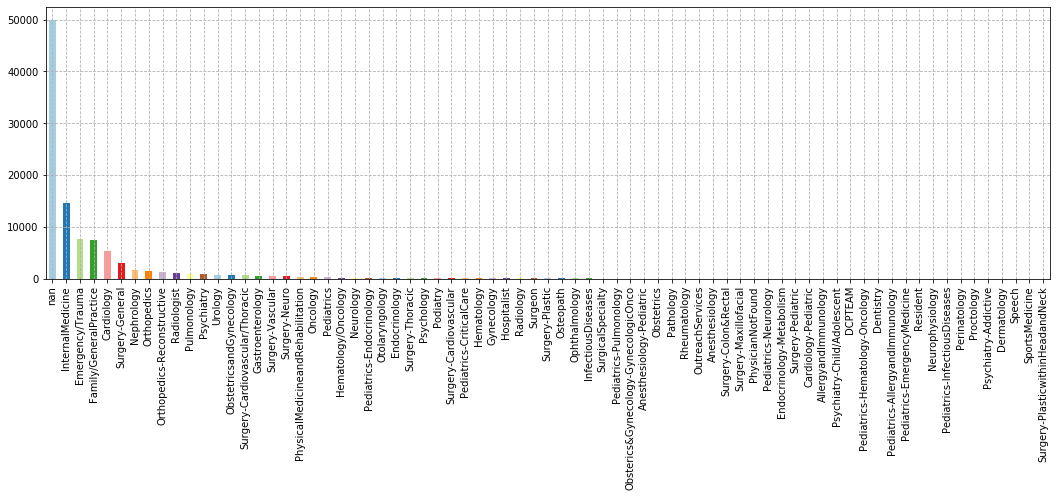

In [15]:
medical_specialty_df = df['medical_specialty'].value_counts(dropna=False)
medical_specialty_df.plot(kind='bar', color=plt.cm.Paired.colors, figsize=(18, 5))
plt.grid(True, linestyle='--');

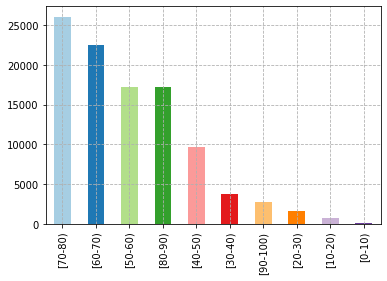

In [16]:
age_df = df['age'].value_counts(dropna=False)
age_df.plot(kind='bar', color=plt.cm.Paired.colors)
plt.grid(True, linestyle='--');

In [17]:
num_cols = list(df.describe().columns)
print(len(num_cols))

13


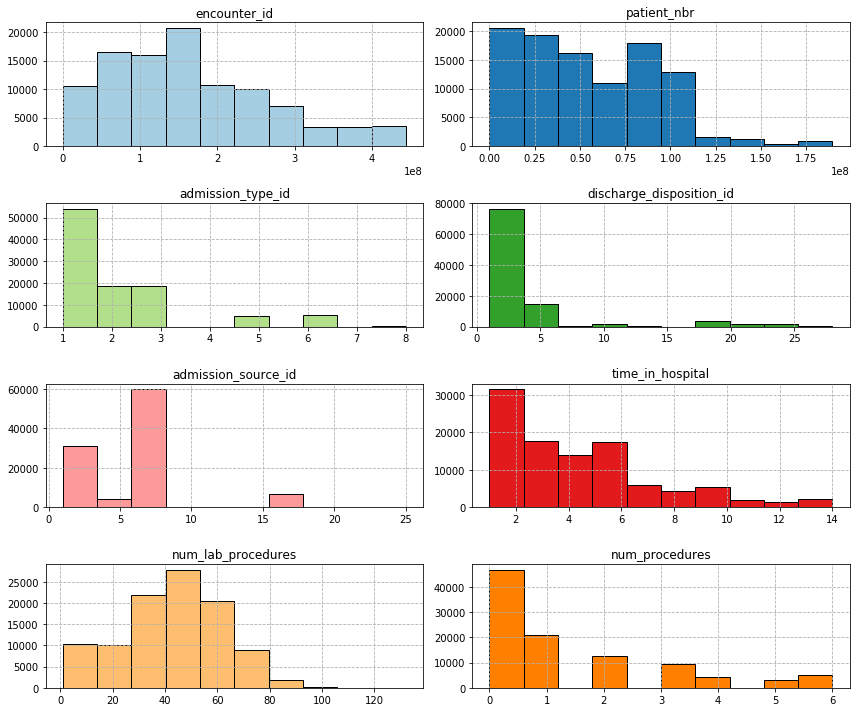

In [18]:
fig, axes = plt.subplots(4, 2, figsize=(12, 10))
colors = plt.cm.Paired.colors
for c, ax, col in zip(colors, axes.flat, num_cols):
    ax.hist(df[col], color=c, edgecolor='k', bins=10)
    ax.set_title(col)
    ax.grid(True, linestyle='--')
fig.tight_layout()

## Removing NAs

In [19]:
df.shape

(101766, 50)

In [20]:
df = df.loc[df.race.notnull()]
df = df.loc[df.gender != 'Unknown/Invalid']

In [21]:
df.drop(['weight', 'medical_specialty', 'payer_code', 'patient_nbr', 'encounter_id'], axis=1, inplace=True)
df.dropna(how='any', inplace=True)

In [22]:
df.isnull().any()

race                        False
gender                      False
age                         False
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                      False
diag_2                      False
diag_3                      False
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide               False
glipizide                   False
glyburide                   False
tolbutamide                 False
pioglitazone                False
rosiglitazone 

In [23]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30


In [24]:
df.shape

(98052, 45)

## Converting categorical variables into dummy variables

In [25]:
# df = pd.get_dummies(df, prefix_sep='_', drop_first=True)

In [26]:
from sklearn.feature_extraction import DictVectorizer
df_to_dict = df.to_dict(orient='records')
dv = DictVectorizer(sparse=True)
df_to_dict_encoded = dv.fit_transform(df_to_dict)

In [27]:
df_encoded = pd.DataFrame(df_to_dict_encoded)

In [28]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98052 entries, 0 to 98051
Data columns (total 1 columns):
0    98052 non-null object
dtypes: object(1)
memory usage: 766.1+ KB


In [29]:
df_encoded.shape

(98052, 1)

# Saving results

In [ ]:
df_encoded.to_csv('data/df_encoded.csv')

In [ ]:
# df.to_csv('data/cleaned_diabetic_data.csv')